In [6]:
! pip install torch-summary

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import json
from torchsummary import summary
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
import librosa.display
import math
import os
from textwrap import dedent

IRMAS_PATH = "/content/drive/MyDrive/ITCS 5156 project/IRMAS dataset/IRMAS-TrainingData/"
JSON_PATH = "/content/drive/MyDrive/ITCS 5156 project/IRMAS dataset/json_files/"
filename = "irmas_data_mfcc13_hop_length256_n_fft2048.json"

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4go4o0FL8-2ugPe9rYARjHpGPlaxOL9n1QpmiJ2KiDAI5KApq3YjQ
Mounted at /content/drive


In [7]:
CHECKPOINT_ROOT = "/content/drive/MyDrive/ITCS 5156 project/trained_models/Learning_rate/"
files = os.listdir(CHECKPOINT_ROOT)

{'learning_rate': 0.1}
{'learning_rate': 0.05}
{'learning_rate': 0.01}
{'learning_rate': 0.005}
{'learning_rate': 0.001}
{'learning_rate': 0.0005}
{'learning_rate': 0.0001}
{'learning_rate': 5e-05}
{'learning_rate': 1e-05}


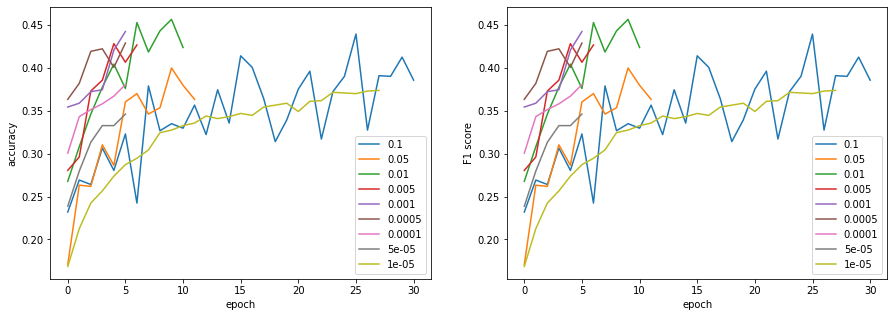

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=[15, 5])
final_accs = []
final_f1s = []
for file in files:

  checkpoint = torch.load(CHECKPOINT_ROOT + file)
  print(checkpoint['experiment_params'])
  ax[0].plot(checkpoint['metrics']['val_acc_hist'], label=checkpoint['experiment_params']['learning_rate'])
  ax[1].plot(checkpoint['metrics']['val_f1_hist'], label=checkpoint['experiment_params']['learning_rate'])
  final_accs.append(checkpoint['metrics']['val_acc_hist'][-1])
  final_f1s.append(checkpoint['metrics']['val_f1_hist'][-1])

ax[0].set_xlabel("epoch")
ax[0].set_ylabel("accuracy")
ax[0].legend()
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("F1 score")
ax[1].legend()


In [9]:
final_accs

[0.3855331841909023,
 0.36316181953765847,
 0.4235645041014168,
 0.42654735272184935,
 0.44220730797912006,
 0.42878448918717377,
 0.38031319910514544,
 0.3460104399701715,
 0.37360178970917224]

In [10]:
final_f1s

[0.3855331841909023,
 0.3631618195376585,
 0.4235645041014168,
 0.42654735272184935,
 0.44220730797912006,
 0.42878448918717377,
 0.38031319910514544,
 0.3460104399701715,
 0.37360178970917224]

{'batch_size': 4}
{'batch_size': 8}
{'batch_size': 16}
{'batch_size': 32}
{'batch_size': 64}
{'batch_size': 128}
{'batch_size': 256}


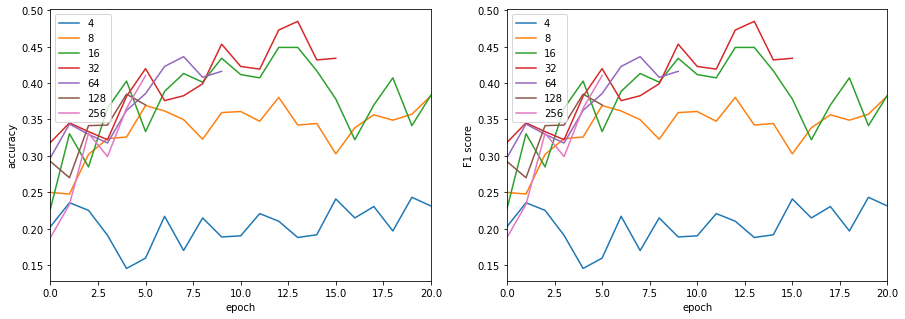

In [14]:
CHECKPOINT_ROOT = "/content/drive/MyDrive/ITCS 5156 project/trained_models/batch_size/"
files = os.listdir(CHECKPOINT_ROOT)
fig, ax = plt.subplots(ncols=2, figsize=[15, 5])
for file in files:

  checkpoint = torch.load(CHECKPOINT_ROOT + file)
  print(checkpoint['experiment_params'])
  ax[0].plot(checkpoint['metrics']['val_acc_hist'], label=checkpoint['experiment_params']['batch_size'])
  ax[1].plot(checkpoint['metrics']['val_f1_hist'], label=checkpoint['experiment_params']['batch_size'])
  final_accs.append(checkpoint['metrics']['val_acc_hist'][-1])
  final_f1s.append(checkpoint['metrics']['val_f1_hist'][-1])

ax[0].set_xlabel("epoch")
ax[0].set_ylabel("accuracy")
ax[0].legend()
ax[0].set_xlim([0, 20])
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("F1 score")
ax[1].set_xlim([0, 20])
ax[1].legend()
